## NIDDK Data Analysis

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [61]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
df = pd.read_csv(filename, header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Statistical Overview of dataset

In [64]:
print('\033[1mThe Shape of the Dataframe:\033[0m', df.shape,"-"*60, sep = "\n")
print("\033[1mDataframe Information:\033[0m")
df.info()

The Shape of the Dataframe:
(768, 9)
------------------------------------------------------------
Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
df_mean = df.describe().loc['mean']
df_describe = df.describe()
print(df_mean, "\n\n")
df_describe

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64 




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
missing_data = df.isnull()
missing_values_counts = {}

for values in missing_data.columns.values.tolist():
     # print(missing_data[values].value_counts())
    missing_values_counts[values] = missing_data[values].value_counts()

missing_values_df = pd.DataFrame(missing_values_counts).T
missing_values_df

,False
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


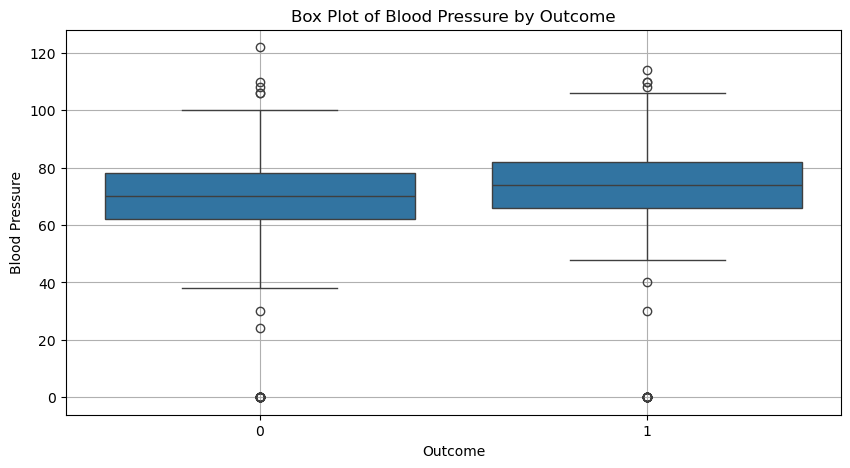

In [167]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Box Plot of Blood Pressure by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.grid(True)

Text(0, 0.5, 'Count')

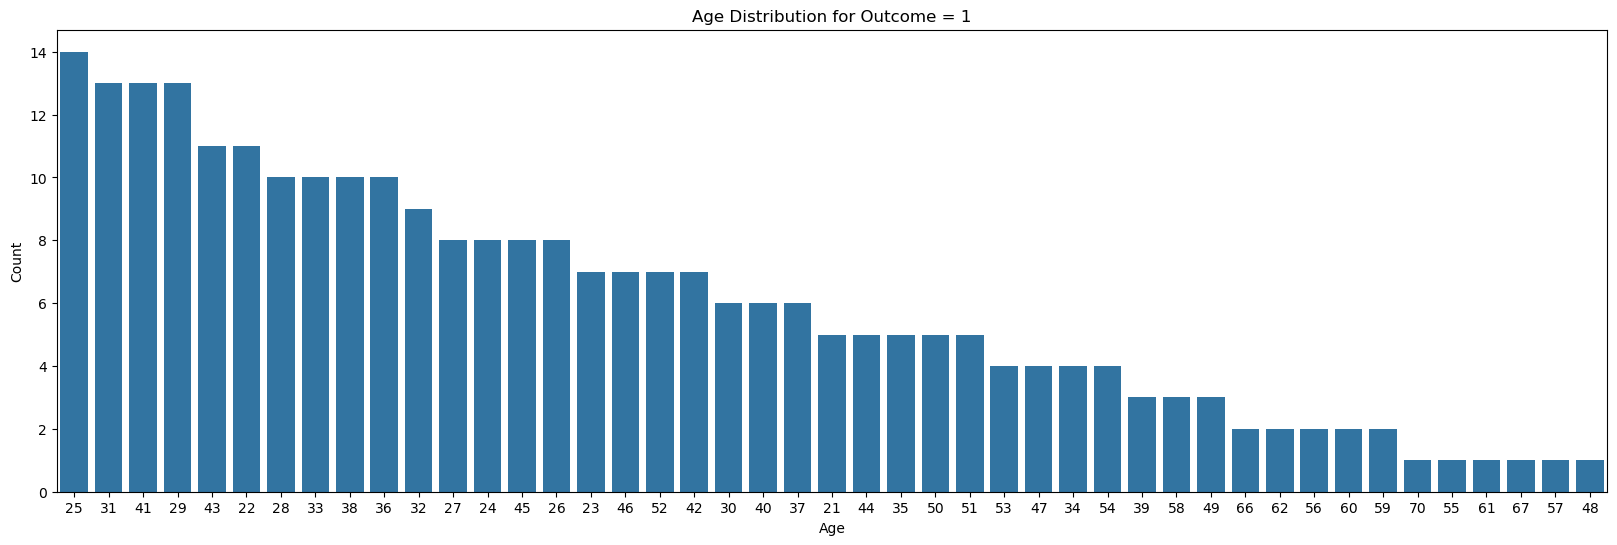

In [136]:
filtered_df = df[df['Outcome'] == 1]

plt.figure(figsize=(20, 6))
sns.countplot(x='Age', data=filtered_df, order=filtered_df['Age'].value_counts().index)
plt.title('Age Distribution for Outcome = 1')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

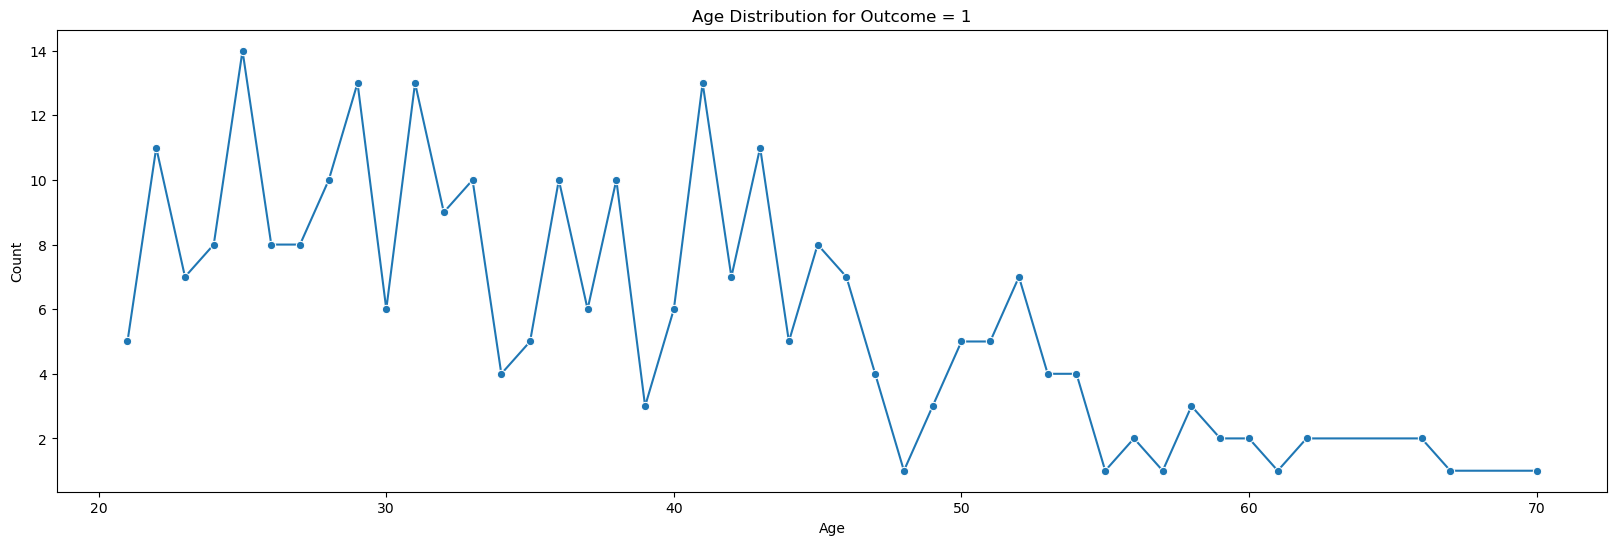

In [161]:
age_counts = filtered_df['Age'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
sns.lineplot(x=age_counts.index, y=age_counts.values, marker='o')
plt.title('Age Distribution for Outcome = 1')
plt.xlabel('Age')
plt.ylabel('Count')

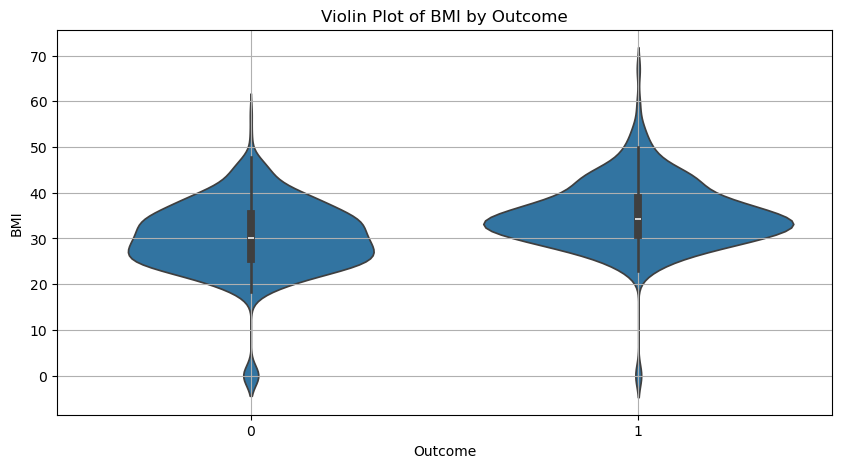

In [165]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title(f'Violin Plot of {"BMI"} by Outcome')
plt.xlabel('Outcome')
plt.ylabel("BMI")
plt.grid(True)
plt.show()

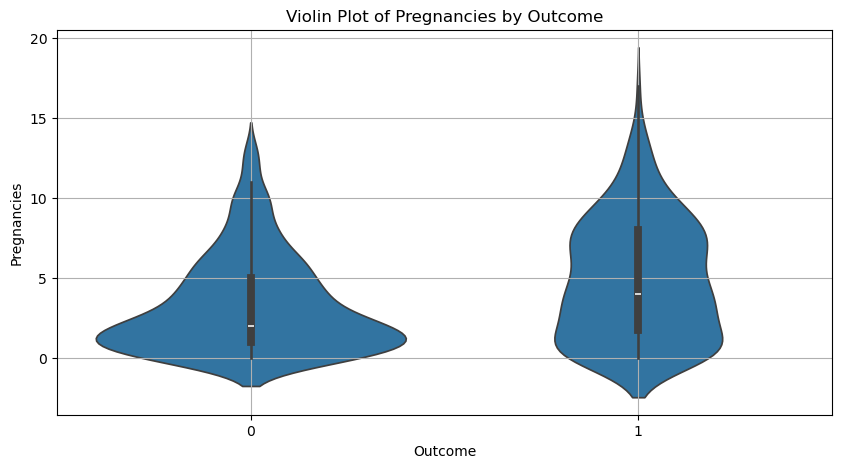

In [163]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Outcome', y='Pregnancies', data=df)
plt.title(f'Violin Plot of {"Pregnancies"} by Outcome')
plt.xlabel('Outcome')
plt.ylabel("Pregnancies")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

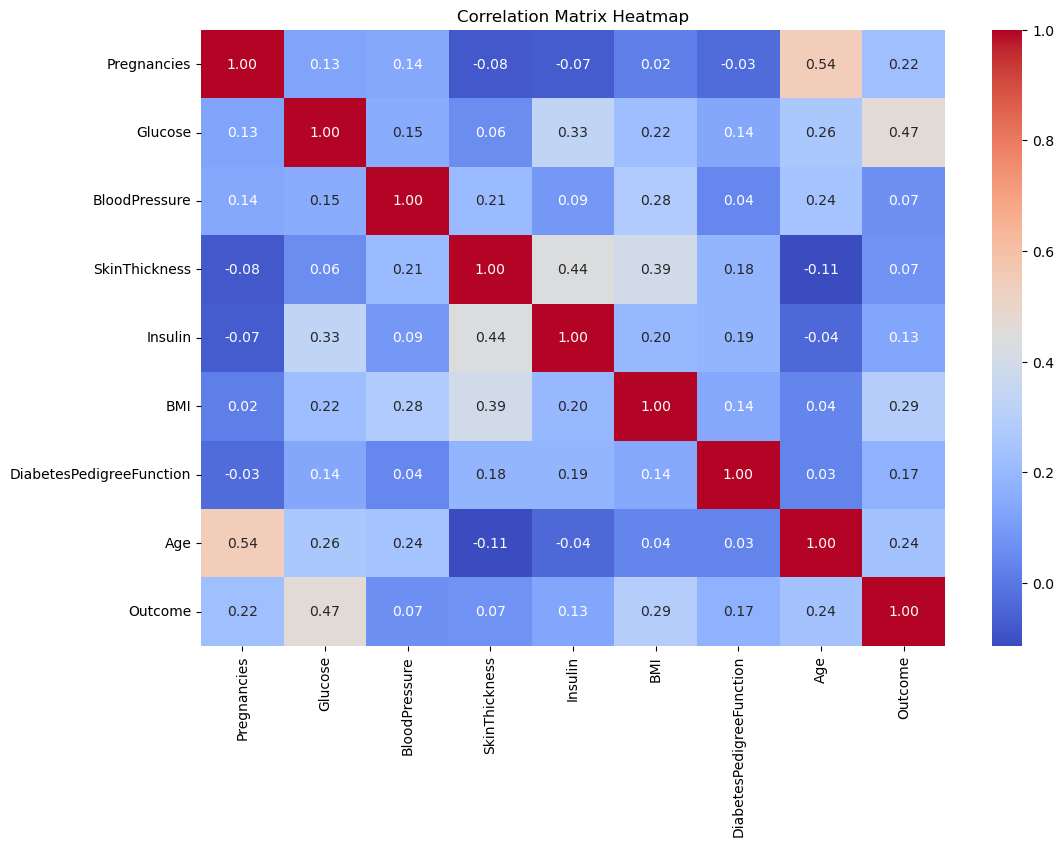

In [113]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')